# Getting Data:

In [1]:
# Jupyter Notebook originally posted at:
# https://www.kaggle.com/adityabhat24/iris-data-analysis-and-machine-learning-python

# Importing the libraries
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(color_codes=True)
import pandas as pd
%matplotlib inline

In [2]:
# Importing the dataset
dataset = pd.read_csv('./iris.csv')
dataset.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
#drop Id column
dataset = dataset.drop('Id',axis=1)
dataset.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# Summary Of the Dataset

In [4]:
# shape
print(dataset.shape)

(150, 5)


In [5]:
# more info on the data
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB
None


In [6]:
# descriptions
print(dataset.describe())

       SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count     150.000000    150.000000     150.000000    150.000000
mean        5.843333      3.054000       3.758667      1.198667
std         0.828066      0.433594       1.764420      0.763161
min         4.300000      2.000000       1.000000      0.100000
25%         5.100000      2.800000       1.600000      0.300000
50%         5.800000      3.000000       4.350000      1.300000
75%         6.400000      3.300000       5.100000      1.800000
max         7.900000      4.400000       6.900000      2.500000


In [7]:
# class distribution
print(dataset.groupby('Species').size())

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


# Visualizations:

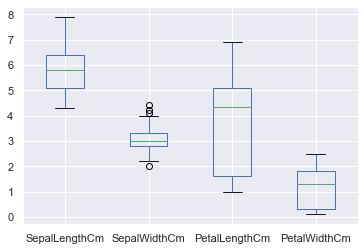

In [8]:
# box and whisker plots
dataset.plot(kind='box', sharex=False, sharey=False)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000169A9940588>,
      dtype=object)

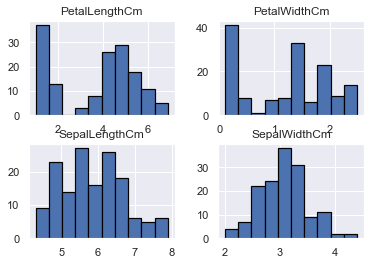

In [9]:
# histograms
dataset.hist(edgecolor='black', linewidth=1.2)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000169A9A2B3C8>,
      dtype=object)

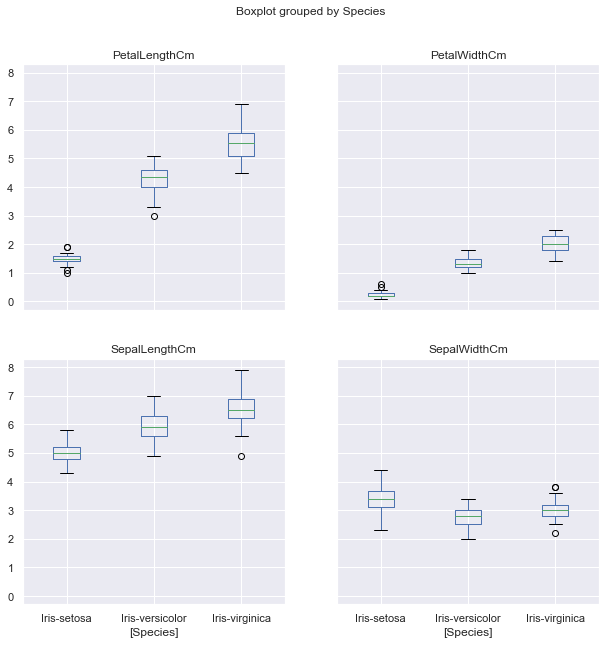

In [10]:
# boxplot on each feature split out by species
dataset.boxplot(by="Species",figsize=(10,10))

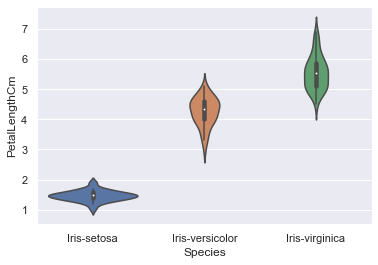

In [11]:
# violinplots on petal-length for each species
sns.violinplot(data=dataset,x="Species", y="PetalLengthCm")

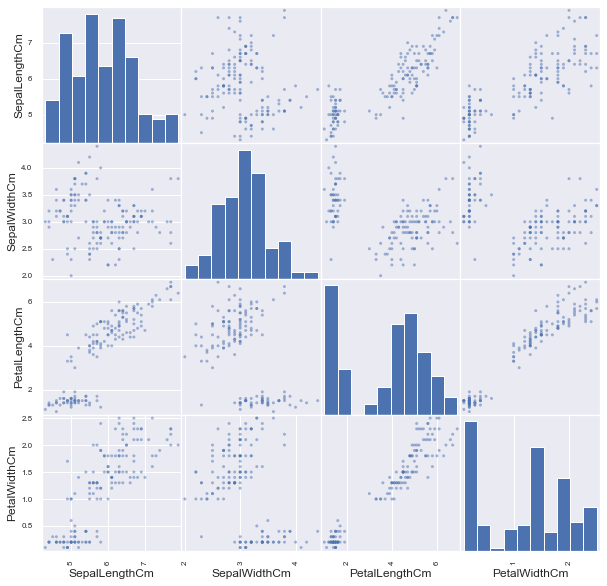

In [12]:
from pandas.plotting import scatter_matrix
# scatter plot matrix
scatter_matrix(dataset,figsize=(10,10))
plt.show()

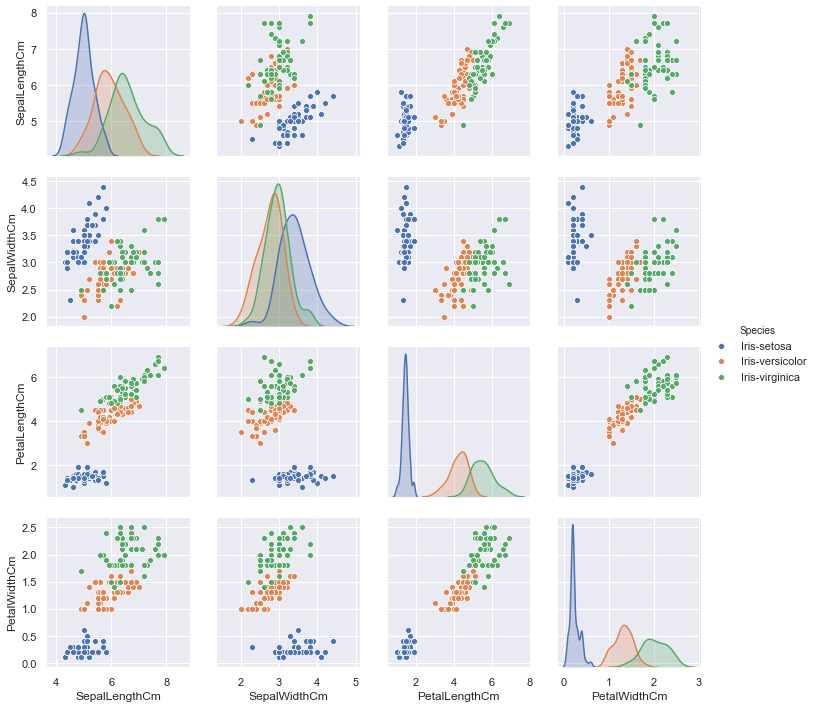

In [13]:
# Using seaborn pairplot to see the bivariate relation between each pair of features
sns.pairplot(dataset, hue="Species")

From the plot, we can see that the species setosa is separataed from the other two across all feature combinations

We can also replace the histograms shown in the diagonal of the pairplot by kde.

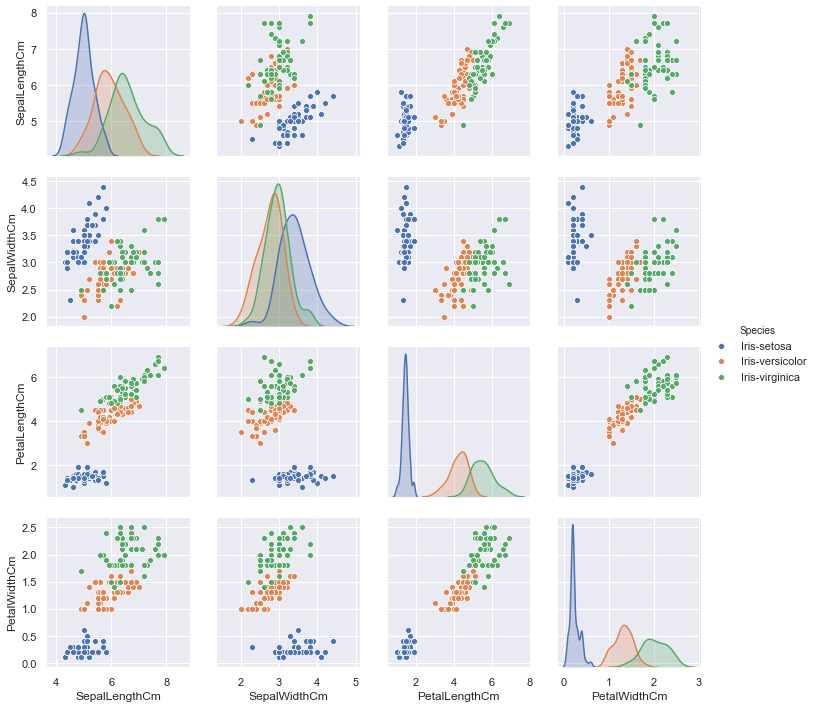

In [18]:
# updating the diagonal elements in a pairplot to show a kde
sns.pairplot(dataset, hue="Species",diag_kind="kde")

# Applying different Classification models:

In [20]:
# Importing metrics for evaluation
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [21]:
# Separating the data into dependent and independent variables
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values
print (X.shape, y.shape)
print (y)

(150, 4) (150,)
['Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 

In [22]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 0)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(90, 4) (60, 4) (90,) (60,)


In [24]:
# Decision Tree's
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier()

# training
classifier.fit(X_train, y_train)

# predicting
y_pred = classifier.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_pred,y_test))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       0.92      0.96      0.94        23
 Iris-virginica       0.95      0.90      0.93        21

       accuracy                           0.95        60
      macro avg       0.96      0.95      0.95        60
   weighted avg       0.95      0.95      0.95        60

[[16  0  0]
 [ 0 22  1]
 [ 0  2 19]]
accuracy is 0.95


In [26]:
# LogisticRegression
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

# Summary of the predictions made by the classifier
#print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_pred,y_test))

[[16  0  0]
 [ 0 18  5]
 [ 0  0 21]]
accuracy is 0.9166666666666666


C:\Users\Acer\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Acer\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [27]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

# Summary of the predictions made by the classifier
#print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_pred,y_test))

[[16  0  0]
 [ 0 23  0]
 [ 0  4 17]]
accuracy is 0.9333333333333333


In [28]:
# Support Vector Machine's 
from sklearn.svm import SVC

classifier = SVC()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_pred,y_test))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       0.92      0.96      0.94        23
 Iris-virginica       0.95      0.90      0.93        21

       accuracy                           0.95        60
      macro avg       0.96      0.95      0.95        60
   weighted avg       0.95      0.95      0.95        60

[[16  0  0]
 [ 0 22  1]
 [ 0  2 19]]
accuracy is 0.95


C:\Users\Acer\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [ ]:
#https://raw.githubusercontent.com/petehunt/c4.5-compiler/master/example/tennis.csv